# Final Year Project
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# WatchYourLanguage
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Intelligent Text Reader with Normalized Text 
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Group Members : 
##### Sibtain Raza Jamali
##### Zeeshan Ali
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### SuperVisor:
### Mr.Muhammad H Mustafa

#### This is an intelligent text-to-speech synthesizer. The first goal to achieve is  "Spoken Text".

# Iteration 1 

In [1]:
# lets start by importing some basic python libraries for analysis of data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning,Visualization ,Statistics


In [2]:
"""
This dataset is well structured ,lets import all the files
"""
training_set=pd.read_csv('en_train.csv')
#training_set.head(15)

Lets find some basic statistics of training set

In [4]:
training_set.describe()

,sentence_id,token_id
count,9.918441e+06,9.918441e+06
mean,3.778565e+05,7.519584e+00
std,2.151371e+05,6.117934e+00
min,0.000000e+00,0.000000e+00
25%,1.925260e+05,3.000000e+00
50%,3.792590e+05,6.000000e+00
75%,5.641890e+05,1.100000e+01
max,7.480650e+05,2.550000e+02


Removing the Null values if any 

In [3]:
training_set['before'].isnull().sum()

51

Oops! it contains 51 null values , lets see whether we need to drop those values or fix them

In [3]:
(training_set[training_set['before'].isnull()]).head(10)

,sentence_id,token_id,class,before,after
616107,49226,17,LETTERS,NaN,n a
684691,54634,1,PLAIN,NaN,NaN
965529,76612,7,PLAIN,NaN,NaN
1011291,80126,5,LETTERS,NaN,n a
1347924,106058,6,PLAIN,NaN,NaN
1909700,149031,16,PLAIN,NaN,NaN
1999090,155865,4,PLAIN,NaN,NaN
2465002,191397,1,PLAIN,NaN,NaN
2765431,214094,1,PLAIN,NaN,NaN
3049822,235589,6,PLAIN,NaN,NaN


Lets examine a sentence with Nan Values 

In [3]:
#lets see a sentence having null tokens
#training_set[training_set['sentence_id']==149031]

### If we remove these values , from our data set , the information from columns of 'token id' and 'Sentence Id' will become redundant and can cause our model to behave abnormal, so it will be better to replace the Nan values with a space for now.

In [3]:
training_set.loc[training_set['before'].isnull(),['before','after']]=' '
#training_set[training_set['sentence_id']==149031]

In [5]:
training_set['before'].isnull().sum()
#training_set[training_set['sentence_id']==149031]

0

Now we have replaced Nan values with a space

Lets deep dive into data

# Training Data
### Number of training Examples = 9918441
### Number of Column = 5

In [4]:
len(training_set['class'].unique())

16

There are 16 distinct classes of words

In [5]:
#lets print these classes 
training_set['class'].value_counts()

PLAIN         7353693
PUNCT         1880507
DATE           258348
LETTERS        152795
CARDINAL       133744
VERBATIM        78108
MEASURE         14783
ORDINAL         12703
DECIMAL          9821
MONEY            6128
DIGIT            5442
ELECTRONIC       5162
TELEPHONE        4024
TIME             1465
FRACTION         1196
ADDRESS           522
Name: class, dtype: int64

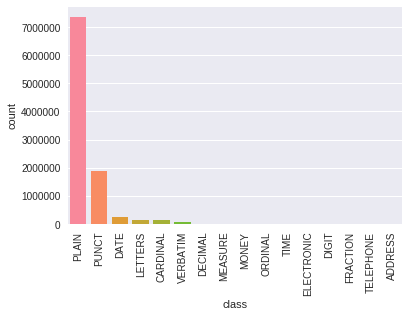

In [12]:
#sns.set_palette("hls")
#fig_size=(11,8)
#fig,axe=plt.subplots(figsize=fig_size)
sns.set_style("darkgrid")
figs=sns.countplot(training_set['class'],saturation=1)

figs.set_xticklabels(training_set['class'].unique(),rotation=90)
plt.show()

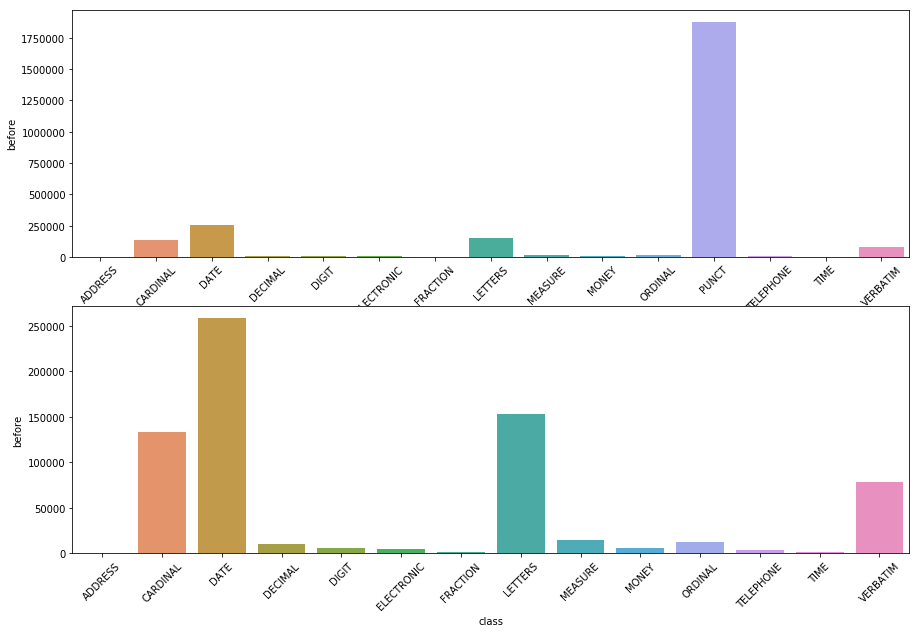

In [3]:
f, axarray = plt.subplots(2, 1, figsize=(15, 10))
hist = training_set.groupby('class', as_index=False).count()
hist = hist[hist['class'] != 'PLAIN']
g= sns.barplot(x = hist['class'], y = hist['before'], ax = axarray[0])
for item in g.get_xticklabels():
    item.set_rotation(45)

hist = hist[hist['class'] != 'PUNCT']
g = sns.barplot(x = hist['class'], y = hist['before'], ax = axarray[1])
for item in g.get_xticklabels():
    item.set_rotation(45)

plt.show()

We can see seaborn is missing many distributions, So lets try bar plot

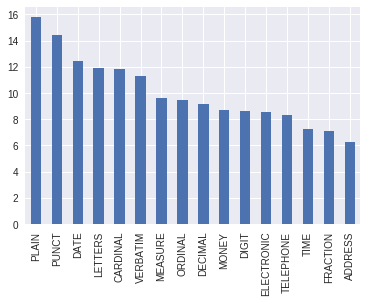

In [13]:
#taking log will normalize the values
np.log(training_set['class'].value_counts()).plot(kind='bar')
plt.show()

Lets see what type of words these classes contains

In [14]:
training_set[training_set['class']=='PLAIN'].sample(5)

,sentence_id,token_id,class,before,after
8840213,668154,7,PLAIN,p,p
4065263,312244,6,PLAIN,detection,detection
5005218,382698,3,PLAIN,sy,sy
1053919,83429,7,PLAIN,so,so
2633219,204114,16,PLAIN,have,have


Plain text contains normal words that remains same even after normalization is performed

In [15]:
training_set[training_set['class']=='PUNCT'].sample(10)

,sentence_id,token_id,class,before,after
6538592,497121,14,PUNCT,"""",""""
3985768,306213,9,PUNCT,.,.
9365579,706964,1,PUNCT,",",","
8385927,634733,1,PUNCT,",",","
508518,40770,7,PUNCT,"""",""""
7287575,552809,4,PUNCT,",",","
862915,68699,13,PUNCT,.,.
4772599,365333,14,PUNCT,.,.
1751804,136948,5,PUNCT,"""",""""
8705595,658326,9,PUNCT,",",","


Are both PLAIN and PUNCT class behaving the same? 
Why not have a test?
We will see how many punct class words have changed in after column

In [4]:
training_set['change']=training_set['before']!=training_set['after']


In [36]:
total=training_set['class'].groupby(training_set['class']).count()

Here we can conclude that PUNCT class doesn't need to be normalized

We have a better idea lets examine which class changes with high frequency for this purpose we will add each change value by groupby clause 

In [5]:
change_per_class=training_set['change'].groupby(training_set['class'])

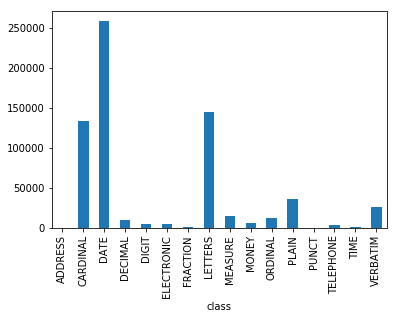

In [6]:
frequency_of_change=change_per_class.sum()
frequency_of_change.plot(kind='bar')


OMG! Our previous observation was wrong about data , We can see that PLAIN class has changed its values for 36472 times
Are you Interseted To have a look at those examples? Yes

# Dictionary for Plain Class
## To keep the words which are being transformed

In [5]:
plain_words=training_set[(training_set['class']=='PLAIN') & (training_set['change']==True)]

In [6]:
plain_words=plain_words.drop(['sentence_id','token_id','class','change'],axis=1)

In [7]:
from collections import defaultdict, Counter
d = defaultdict(list)
train_list = [(plain_words['before'].iloc[i],plain_words['after'].iloc[i]) for i in range(plain_words.shape[0])]
for k,v in train_list:
    d[k].append(v)
counter_dict = {}
for key in d:
    c = Counter(d[key]).most_common(1)[0][0]
    counter_dict[key] = c

In [8]:
plain_words=counter_dict.copy()
del counter_dict
del train_list
del d

### We have a dictionary for plain class

In [86]:
training_set[(training_set['class']=='PLAIN') & (training_set['change']==True)].sample(5)

,sentence_id,token_id,class,before,after,change
5444866,415630,11,PLAIN,-,to,True
5430896,414580,5,PLAIN,vs,versus,True
335835,26986,6,PLAIN,-,to,True
3965090,304629,1,PLAIN,-,to,True
4448084,340954,20,PLAIN,-,to,True


In [26]:
training_set[(training_set['class']=='LETTERS') & (training_set['change']==True)].sample(5)

,sentence_id,token_id,class,before,after,change
3831142,294592,3,LETTERS,USA,u s a,True
301420,24255,3,LETTERS,N.,n,True
5294704,404425,14,LETTERS,K.,k,True
1088189,86061,6,LETTERS,i.e.,i e,True
7330668,556069,7,LETTERS,PDF,p d f,True


In [27]:
training_set[(training_set['class']=='CARDINAL') & (training_set['change']==True)].sample(5)

,sentence_id,token_id,class,before,after,change
839190,66858,6,CARDINAL,II,two,True
5820730,443751,16,CARDINAL,75,seventy five,True
7234891,548875,9,CARDINAL,2551,two thousand five hundred fifty one,True
2228127,173317,13,CARDINAL,7,seven,True
2126783,165610,3,CARDINAL,24,twenty four,True


In [84]:
training_set[(training_set['class']=='DATE') & (training_set['change']==True)].sample(10)


,sentence_id,token_id,class,before,after,change
152394,12228,0,DATE,24 August 2007,the twenty fourth of august two thousand seven,True
8515138,644249,18,DATE,1986,nineteen eighty six,True
5441241,415352,4,DATE,5 October 2011,the fifth of october twenty eleven,True
407161,32664,1,DATE,8 September 2011,the eighth of september twenty eleven,True
4369420,335089,4,DATE,2011,twenty eleven,True
8283863,627114,9,DATE,2007,two thousand seven,True
6392407,486271,4,DATE,1999,nineteen ninety nine,True
5061558,386978,4,DATE,"April 14, 2006",april fourteenth two thousand six,True
2820127,218302,1,DATE,2009,two thousand nine,True
8459490,640157,14,DATE,1976,nineteen seventy six,True


In [29]:
training_set[(training_set['class']=='DECIMAL') & (training_set['change']==True)].sample(5)


,sentence_id,token_id,class,before,after,change
1093430,86479,25,DECIMAL,.20901,point two o nine o one,True
4163422,319583,2,DECIMAL,.21,point two one,True
2667250,206645,7,DECIMAL,4.5,four point five,True
4666423,357323,4,DECIMAL,599.6,five hundred ninety nine point six,True
8407545,636319,12,DECIMAL,0.2,zero point two,True


In [30]:
training_set[(training_set['class']=='DIGIT') & (training_set['change']==True)].sample(5)


,sentence_id,token_id,class,before,after,change
5065144,387237,3,DIGIT,1999,one nine nine nine,True
2441160,189603,12,DIGIT,2004,two o o four,True
9682913,730689,12,DIGIT,01,o one,True
3237677,249782,13,DIGIT,1,one,True
2606247,202068,4,DIGIT,173-,one seven three,True


In [74]:
training_set[(training_set['class']=='VERBATIM') & (training_set['change']==True)].sample(25)


,sentence_id,token_id,class,before,after,change
8823364,666939,15,VERBATIM,σ,sigma,True
3480083,268195,12,VERBATIM,Ph,p h,True
8385942,634734,9,VERBATIM,pg,p g,True
5213851,398374,3,VERBATIM,Ph,p h,True
5110240,390604,6,VERBATIM,&,and,True
4152593,318774,13,VERBATIM,&,and,True
2130447,165884,11,VERBATIM,&,and,True
1307732,102929,9,VERBATIM,&,and,True
7639477,579190,1,VERBATIM,#,number,True
2129172,165793,13,VERBATIM,Β,beta,True


In [32]:
training_set[(training_set['class']=='MEASURE') & (training_set['change']==True)].sample(5)


,sentence_id,token_id,class,before,after,change
8960938,677080,12,MEASURE,8.9%,eight point nine percent,True
377876,30357,10,MEASURE,1.7/km2,one point seven per square kilometers,True
5307924,405407,7,MEASURE,"54,000 m2",fifty four thousand square meters,True
5115010,390976,15,MEASURE,53.2%,fifty three point two percent,True
7740787,586771,18,MEASURE,1 m,one meter,True


In [33]:
training_set[(training_set['class']=='ELECTRONIC') & (training_set['change']==True)].sample(5)


,sentence_id,token_id,class,before,after,change
4139333,317787,6,ELECTRONIC,Dictionary.com,d i c t i o n a r y dot c o m,True
138761,11138,2,ELECTRONIC,http://www.jaabc.com/brcv14n1preview.htmlHarvard,h t t p colon slash slash w w w dot j a a b c ...,True
9066406,684927,13,ELECTRONIC,thestar.com,t h e s t a r dot c o m,True
1361436,107082,5,ELECTRONIC,Reference.com,r e f e r e n c e dot c o m,True
1466242,115156,7,ELECTRONIC,http://www.nps.edu/Programs/CCS/Ghor/Ghor.html,h t t p colon slash slash w w w dot n p s dot ...,True


In [34]:
training_set[(training_set['class']=='ORDINAL') & (training_set['change']==True)].sample(5)


,sentence_id,token_id,class,before,after,change
8913369,673545,13,ORDINAL,3rd,third,True
3063989,236650,4,ORDINAL,18th,eighteenth,True
1658825,129822,7,ORDINAL,100th,one hundredth,True
5878991,448149,14,ORDINAL,II,the second,True
3649365,280920,11,ORDINAL,II,the second,True


In [35]:
training_set[(training_set['class']=='MONEY') & (training_set['change']==True)].sample(5)


,sentence_id,token_id,class,before,after,change
4206441,322794,13,MONEY,"$450,000",four hundred fifty thousand dollars,True
7077724,537198,8,MONEY,$1.6 Billion,one point six billion dollars,True
1832813,143154,6,MONEY,$10m,ten million dollars,True
5170224,395085,7,MONEY,$1.8 billion,one point eight billion dollars,True
5386892,411273,5,MONEY,"$26,000",twenty six thousand dollars,True


In [107]:
training_set[(training_set['class']=='TIME') & (training_set['change']==True)].sample(5)


,sentence_id,token_id,class,before,after,change
7126648,540840,2,TIME,18:19,eighteen nineteen,True
939242,74596,12,TIME,08:30,eight thirty,True
6934578,526594,3,TIME,22:52,twenty two fifty two,True
8219153,622359,8,TIME,9pm,nine p m,True
1146267,90539,9,TIME,2:44,two forty four,True


In [108]:
training_set[(training_set['class']=='ADDRESS') & (training_set['change']==True)].sample(5)


,sentence_id,token_id,class,before,after,change
9822392,740977,1,ADDRESS,C1,c one,True
2852484,220709,0,ADDRESS,C35,c thirty five,True
3304040,254841,11,ADDRESS,C2,c two,True
7742891,586927,5,ADDRESS,A27,a twenty seven,True
2881181,222896,1,ADDRESS,M85,m eighty five,True


In [37]:
training_set[(training_set['class']=='TELEPHONE') & (training_set['change']==True)].sample(5)

,sentence_id,token_id,class,before,after,change
215228,17385,8,TELEPHONE,0-375-42366-4,o sil three seven five sil four two three six ...,True
6043038,460407,16,TELEPHONE,978-4-06-292078-0,nine seven eight sil four sil o six sil two ni...,True
3040192,234863,2,TELEPHONE,090423,o nine o four two three,True
3017223,233120,1,TELEPHONE,0-333-76147-2,o sil three three three sil seven six one four...,True
1556290,122054,1,TELEPHONE,978-84-613-2333-3,nine seven eight sil eight four sil six one th...,True


# Deep Learning Fun begins

Now we have explored all the classes, now lets work on Many To One Sequence modling

In [9]:
from sklearn.model_selection import train_test_split

### Average length of word token is 7 to 8, lets get Ascii encodings of words, (Numerical Representation)

In [17]:
def get_encodings(data_set,length_of_encodings):
    average_token_length = length_of_encodings
    x_data = []
    spacing = 0
    for x in data_set['before'].values:
        x_row = np.ones(average_token_length, dtype=int) * spacing
        for xi, i in zip(list(str(x)), np.arange(average_token_length)):
            x_row[i] = ord(xi)
        x_data.append(x_row)
    x_data=np.asarray(x_data)
    return x_data

In [18]:
import gc
gc.collect()
x_data=get_encodings(training_set,10)


In [83]:
x_data=np.load("train_Encodings.npy")

In [84]:
"""
This function of pandas will convert each label into an integer
"""
def get_training_labels(data_set):
    labels=pd.factorize(data_set['class'])
    return labels


In [85]:
train_labels=get_training_labels(training_set)
label_names=train_labels[1]
label_encodes=train_labels[0]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_data,label_encodes,test_size=0.33, random_state=42)

In [87]:
from keras.layers import Input, Dense, Embedding, merge,Convolution2D, MaxPooling2D, Dropout

from keras.layers.core import Reshape, Flatten
from keras.callbacks import ModelCheckpoint

from keras.optimizers import Adam
from keras.models import Model
from tensorflow.contrib import keras
import tensorflow
from keras.models import Sequential,Input
from keras.layers import LSTM,SimpleRNN,Activation,Flatten,BatchNormalization




# CNN Model Implementation With 3 Convo2D,3 Max Pool layers

In [ ]:
def create_model():
    sequence_length = x_data.shape[1]
    vocabulary_size = 240
    embedding_dim = 10
    filter_sizes = [3,4,5]
    num_filters = 512
    drop = 0.5

    nb_epoch = 2
    batch_size = 30
    inputs = Input(shape=(sequence_length,), dtype='int32')
    embedding = Embedding(output_dim=embedding_dim, input_dim=vocabulary_size, input_length=sequence_length)(inputs)
    reshape = Reshape((sequence_length,embedding_dim,1))(embedding)
    conv_0 = Convolution2D(num_filters, filter_sizes[0], embedding_dim, border_mode='valid', 
                           init='normal', activation='relu', dim_ordering='tf')(reshape)
    conv_1 = Convolution2D(num_filters, filter_sizes[1], embedding_dim, border_mode='valid',
                           init='normal', activation='relu', dim_ordering='tf')(reshape)
    conv_2 = Convolution2D(num_filters, filter_sizes[2], embedding_dim, border_mode='valid',
                           init='normal', activation='relu', dim_ordering='tf')(reshape)
    maxpool_0 = MaxPooling2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1),
                             border_mode='valid', dim_ordering='tf')(conv_0)
    maxpool_1 = MaxPooling2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1),
                             border_mode='valid', dim_ordering='tf')(conv_1)
    maxpool_2 = MaxPooling2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1),
                             border_mode='valid', dim_ordering='tf')(conv_2)
    merged_tensor = merge([maxpool_0, maxpool_1, maxpool_2], mode='concat', concat_axis=1)
    flatten = Flatten()(merged_tensor)
    dropout = Dropout(drop)(flatten)
    output = Dense(output_dim=16, activation='softmax')(dropout)
    model = Model(input=inputs, output=output)
    return model

In [100]:
"""
Training of CNN model
"""
model=create_model()
checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1,
                             save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, callbacks=[checkpoint], validation_data=(x_test, y_test))  # starts training




/home/jamali-bro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 10), kernel_initializer="normal", activation="relu", data_format="channels_last", padding="valid")`
  app.launch_new_instance()
/home/jamali-bro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (4, 10), kernel_initializer="normal", activation="relu", data_format="channels_last", padding="valid")`
/home/jamali-bro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (5, 10), kernel_initializer="normal", activation="relu", data_format="channels_last", padding="valid")`
/home/jamali-bro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(padding="valid", strides=(1, 1), data_for

Train on 6942908 samples, validate on 2975533 samples
Epoch 1/2
6942908/6942908 [==============================] - 7565s - loss: 0.0315 - acc: 0.9913 - val_loss: 0.0210 - val_acc: 0.9936
Epoch 2/2
6942908/6942908 [==============================] - 7518s - loss: 0.0210 - acc: 0.9937 - val_loss: 0.0189 - val_acc: 0.9943


In [101]:
model.save("CNN_DropOut.sav")

# LSTM Implementation and Training

In [103]:
"""
LSTM model will predict classes of each word

"""
vocab_length=240
embedding_output=10
word_length=10
model = Sequential()
model.add(Embedding(input_dim=vocab_length,output_dim=embedding_output,input_length=word_length))
model.add(LSTM(15))
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(Activation("softmax"))
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'], optimizer='rmsprop')
model.fit(x_data,l[0],epochs=20,batch_size=1000)

Epoch 1/20
9918441/9918441 [==============================] - 1215s - loss: 0.1079 - acc: 0.9734  
Epoch 2/20
9918441/9918441 [==============================] - 1216s - loss: 0.0479 - acc: 0.9876  
Epoch 3/20
9918441/9918441 [==============================] - 1215s - loss: 0.0412 - acc: 0.9891  
Epoch 4/20
9918441/9918441 [==============================] - 1252s - loss: 0.0388 - acc: 0.9897  
Epoch 5/20
9918441/9918441 [==============================] - 1254s - loss: 0.0373 - acc: 0.9901  
Epoch 6/20
9918441/9918441 [==============================] - 1257s - loss: 0.0363 - acc: 0.9903  
Epoch 7/20
9918441/9918441 [==============================] - 1256s - loss: 0.0356 - acc: 0.9904  
Epoch 8/20
9918441/9918441 [==============================] - 1259s - loss: 0.0356 - acc: 0.9905  
Epoch 9/20
9918441/9918441 [==============================] - 1260s - loss: 0.0351 - acc: 0.9906  
Epoch 10/20
9918441/9918441 [==============================] - 1258s - loss: 0.0348 - acc: 0.9906  
Epoch 11/

In [111]:
model.save("LSTM_DropOut.sav")

In [123]:
"""
Laod the pretrained CNN Model
"""

model = create_model()
model.load_weights("weights.001-0.9943.hdf5")

# RNN Training 

In [26]:
"RNN Model to predict classes "
hidden_neurons = 240
nb_classes =16
embedding_size =10
model = Sequential()
model.add(Embedding(input_dim=hidden_neurons,output_dim=embedding_size,input_length=10))
model.add(SimpleRNN(15, return_sequences=False)) 
model.add(Dense(nb_classes))
model.add(Activation("softmax"))
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'], optimizer='rmsprop')
model.fit(x_train,y_train,epochs=10,batch_size=100)

Train on 6942908 samples, validate on 2975533 samples
Epoch 1/1
6942908/6942908 [==============================] - 704s - loss: 0.0604 - acc: 0.9855 - val_loss: 0.0349 - val_acc: 0.9910


# Test Time

In [15]:
test2=pd.read_csv('en_test_2.csv')
xtest2_data=get_encodings(test2,10)
predictions=model.predict(xtest2_data)
indices=np.argmax(predictions,axis=1)
tested2=[label_names[x] for x in indices]
test2['class']=tested2

In [29]:
from writtenToSpoken import address,cardinal,date,decimal
from writtenToSpoken import digit,electronic,fraction,letters,measure,money,telephone,time,ordinal,verbatim
import writtenToSpoken

# Normalization Begins

In [12]:
def plain(x):
    try:
        out=plain_words[x]
        return out
    except:
        return x

In [19]:
df_plain = test2[test2['class']=="PLAIN"]
df_plain['after']=df_plain['before'].apply(lambda x: plain(x))

In [20]:
df_punct = test2[test2['class']=="PUNCT"]
df_punct['after']=df_punct['before']

In [21]:
df_cardinal = test2[test2['class']=="CARDINAL"]
output=[]
for i in range(0,df_cardinal.shape[0]):
    output.append(cardinal(df_cardinal.iloc[i,2]))
df_cardinal['after']=output

In [22]:
df_date = test2[test2['class']=="DATE"]
output=[]
for i in range(0,df_date.shape[0]):
    output.append(date(df_date.iloc[i,2]))
df_date['after']=output

In [23]:
df_letters = test2[test2['class']=="LETTERS"]
output=[]
for i in range(0,df_letters.shape[0]):
    output.append(letters(df_letters.iloc[i,2]))
df_letters['after']=output

In [24]:

df_verbatim = test2[test2['class']=="VERBATIM"]
output=[]
for i in range(0,df_verbatim.shape[0]):
    output.append(verbatim(df_verbatim.iloc[i,2]))
df_verbatim['after']=output

In [25]:
df_money = test2[test2['class']=="MONEY"]
output=[]
for i in range(0,df_money.shape[0]):
    output.append(money(df_money.iloc[i,2]))
df_money['after']=output

In [26]:
df_measure = test2[test2['class']=="MEASURE"]
output=[]
for i in range(0,df_measure.shape[0]):
    output.append(measure(df_measure.iloc[i,2]))
df_measure['after']=output

In [27]:
df_electronic = test2[test2['class']=="ELECTRONIC"]
output=[]
for i in range(0,df_electronic.shape[0]):
    output.append(electronic(df_electronic.iloc[i,2]))
df_electronic['after']=output

In [28]:
df_telephone = test2[test2['class']=="TELEPHONE"]
output=[]
for i in range(0,df_telephone.shape[0]):
    output.append(telephone(df_telephone.iloc[i,2]))
df_telephone['after']=output

In [29]:
df_decimal=test2[test2['class']=="DECIMAL"]
output=[]
for i in range(0,df_decimal.shape[0]):
    output.append(decimal(df_decimal.iloc[i,2]))
df_decimal['after']=output

In [30]:
df_digit=test2[test2['class']=="DIGIT"]
output=[]
for i in range(0,df_digit.shape[0]):
    output.append(digit(df_digit.iloc[i,2]))
df_digit['after']=output

In [31]:

output=[]
df_ordinal=test2[test2['class']=="ORDINAL"]
for i in range(0,df_ordinal.shape[0]):
    output.append(ordinal(df_ordinal.iloc[i,2]))
df_ordinal['after']=output

In [32]:
output=[]
df_fraction=test2[test2['class']=="FRACTION"]
for i in range(0,df_fraction.shape[0]):
    output.append(fraction(df_fraction.iloc[i,2]))
df_fraction['after']=output

In [33]:
output=[]
df_time=test2[test2['class']=="TIME"]
for i in range(0,df_time.shape[0]):
    output.append(time(df_time.iloc[i,2]))
df_time['after']=output

In [34]:

output=[]
df_address=test2[test2['class']=="ADDRESS"]
for i in range(0,df_address.shape[0]):
    output.append(address(df_address.iloc[i,2]))
df_address['after']=output


In [35]:
results=df_plain.append(df_address).append(df_cardinal).append(df_date).append(df_digit).append(df_electronic).append(df_letters).append(df_decimal).append(df_measure).append(df_money).append(df_punct)

In [36]:
results=results.append(df_ordinal).append(df_fraction).append(df_telephone).append(df_time).append(df_verbatim)

In [37]:
results=results.sort_index()


In [38]:
results['id'] = test2[['sentence_id','token_id']].apply(lambda x: str(x[0])+"_"+str(x[1]),axis=1)

In [39]:
results=results.drop(['sentence_id','token_id','class','before'],axis=1)

In [40]:
results.to_csv("submission5.csv",index=False)

# FYP2 Starts

In [92]:
def get_test_encodings(list_of_words):
    max_num_vectors = 10
    test2_data = []
    space = 0
    for x in list_of_words:
        x_row = np.ones(max_num_vectors, dtype=int) * space
        for xi, i in zip(list(str(x)), np.arange(max_num_vectors)):
            x_row[i] = ord(xi)
        test2_data.append(x_row)
    test2_data=np.asarray(test2_data)
    return test2_data

In [118]:
def rawToTabuler(text):
    text_split = re.findall(r"\w+|[^\w\s]", text, re.UNICODE)
    table = pd.DataFrame(columns=['sentence_id', 'token_id', 'before'])
    sentence_id, token_id = 0, 0
    for ts in range(len(text_split)):
        table.loc[ts] = [str(sentence_id), str(token_id), text_split[ts]]
        token_id += 1
        if text_split[ts] == '.':
            sentence_id += 1
            token_id = 0
    return table

In [119]:
encodes=get_test_encodings()


In [124]:
predicted=np.argmax(model.predict(encodes),axis=1)
